<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Image Compression Using PCA

---

In this lab we are going to read in the Olivetti faces dataset, a set of photographs of faces. 

- First we are going to process and depict the images.
- Then we are going to use principal component analysis on the images to extract the most important parts.
- We will compare the images with reduced amount of information with the original ones.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

 
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

np.set_printoptions(precision=4)

## Faces Dataset
---

Let's load in the Olivetti faces dataset from sklearn.

In [129]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()
print(dataset.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

### Load the Dataset


- There are 400 images of faces. (i.e. rows of data)
- Each image is 64x64 pixels, i.e. a total of 4096 pixels (i.e. features)

In [130]:
dataset = fetch_olivetti_faces()
faces = dataset.data
faces.shape

(400, 4096)

In [131]:
dataset.target[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Let's look at a single observation

In [132]:
face10 = faces[10]
print((face10.shape))

# This is a grayscale image, so each pixel is from 0 (black) to 1 (white)
print(face10)

(4096,)
[0.5413 0.5868 0.6405 ... 0.095  0.1116 0.1116]


#### Set up a couple of functions, one to process an image (reshape it to a 2D matrix) and the other to actually plot the image matrix.

In [133]:
def plot_image_matrix(face_image):
    """ 
    Plots a grayscale 2-D ndarray `face_image`. 
        Pixel values can have any scale.
    """
    fig, ax = plt.subplots(figsize=(5,5))
    
    # max value (in magnitude)
    max_pixel_value = max(face_image.max(), -face_image.min())
    
    ax.imshow(face_image, cmap=plt.cm.gray,
              interpolation='nearest', 
              vmin=-max_pixel_value,
              vmax=max_pixel_value)
    
    ax.set_xticks(())
    ax.set_yticks(())

def process_image(image):
    """ 
    Standardize a 1-D 4096-element ndarray `image` to end up with:
      - A new 2-D 64x64-element ndarray, with
      - Pixel values between (-0.5, 0.5).
    """

    # Min-Max scaling to end up with values between (-0.5, 0.5)
    image = image.reshape(-1,1)
    scaler = MinMaxScaler(feature_range=(-0.5,0.5)) # rescaled to get more contrast for the black / white
    # picture ie. transforming (0,1) to (-0.5,1.5)
    
    image = scaler.fit_transform(image)

    
    # Convert the 4096-element `image` to 64x64
    image.shape = (64,64)
    return image

In [134]:
face10 = process_image(faces[10])
print((face10.shape))
print(face10)

(64, 64)
[[ 0.0291  0.0825  0.1456 ...  0.034   0.0437  0.0485]
 [ 0.0437  0.1165  0.165  ...  0.068   0.0777  0.0728]
 [ 0.0728  0.1602  0.1893 ...  0.0631  0.1019  0.0971]
 ...
 [-0.4563 -0.4466 -0.4466 ... -0.5    -0.4709 -0.4806]
 [-0.4515 -0.4466 -0.4515 ... -0.4951 -0.4757 -0.4806]
 [-0.4466 -0.4515 -0.4466 ... -0.4951 -0.4757 -0.4757]]


Given the image below and the image matrix above:
- The top rows are light colored.
    - So, the first few rows of numbers are > 0.0
- The final rows start dark and end dark. 
    - So, the last few rows of numbers start and end < 0.0
- If you print out the full final row, what would you expect the middle numbers to look like?

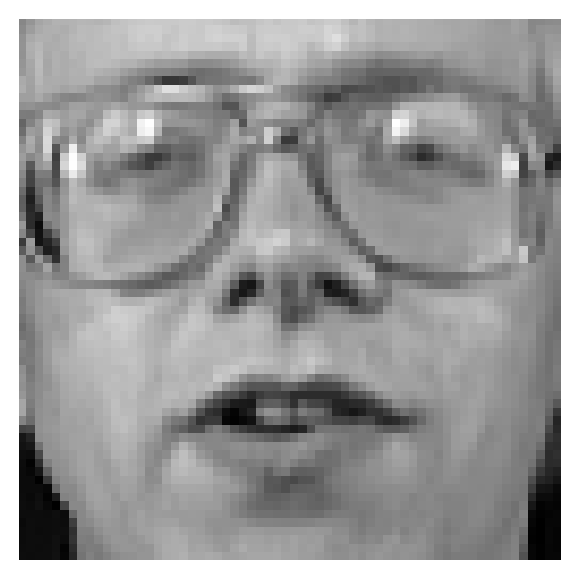

In [135]:
plot_image_matrix(process_image(face10))

#### Another picture

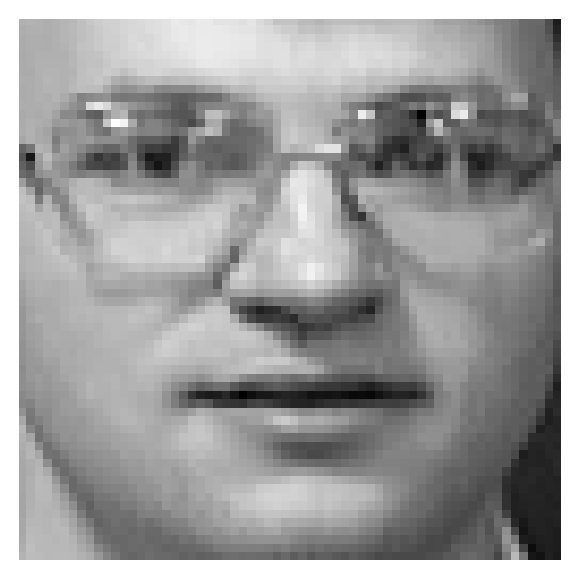

In [136]:
plot_image_matrix(process_image(faces[50]))

## PCA on the image

#### Take picture number 10 reshaped to 64 times 64 pixels

In [137]:
face10

array([[ 0.0291,  0.0825,  0.1456, ...,  0.034 ,  0.0437,  0.0485],
       [ 0.0437,  0.1165,  0.165 , ...,  0.068 ,  0.0777,  0.0728],
       [ 0.0728,  0.1602,  0.1893, ...,  0.0631,  0.1019,  0.0971],
       ...,
       [-0.4563, -0.4466, -0.4466, ..., -0.5   , -0.4709, -0.4806],
       [-0.4515, -0.4466, -0.4515, ..., -0.4951, -0.4757, -0.4806],
       [-0.4466, -0.4515, -0.4466, ..., -0.4951, -0.4757, -0.4757]],
      dtype=float32)

#### Transform to principal components

Limit the number of components as you find suitable.

- Instantiate PCA
- Fit and transform the image
- Extract the explained variance and the explained variance ratio

In [138]:
from sklearn.decomposition import PCA

In [139]:
pca = PCA()
face_pca = pd.DataFrame(pca.fit_transform(face10))
print('Explained Variance:')
print(pca.explained_variance_)
print('Explained Variance Ratio:')
print(pca.explained_variance_ratio_)

Explained Variance:
[4.1140e-01 3.2300e-01 1.5056e-01 7.1360e-02 5.0905e-02 4.3151e-02
 3.3072e-02 2.7902e-02 2.5384e-02 2.1980e-02 1.5652e-02 1.1741e-02
 9.6080e-03 7.5679e-03 5.8454e-03 5.0891e-03 4.5659e-03 4.3274e-03
 3.3975e-03 3.0483e-03 2.8140e-03 2.2853e-03 1.6623e-03 1.5301e-03
 1.2183e-03 1.0260e-03 8.0246e-04 6.6347e-04 6.0477e-04 5.0931e-04
 4.1555e-04 3.8703e-04 3.3616e-04 2.5951e-04 1.9700e-04 1.8792e-04
 1.6551e-04 1.5237e-04 1.1232e-04 9.1743e-05 7.4834e-05 6.6473e-05
 5.7780e-05 5.6353e-05 4.5736e-05 3.7500e-05 3.2394e-05 2.4565e-05
 2.1261e-05 1.8964e-05 1.2287e-05 1.1128e-05 8.5772e-06 7.6802e-06
 6.5591e-06 3.6768e-06 2.3157e-06 2.0233e-06 1.5385e-06 9.7859e-07
 4.5922e-07 2.5710e-07 2.3033e-08 2.3149e-14]
Explained Variance Ratio:
[3.3031e-01 2.5934e-01 1.2089e-01 5.7295e-02 4.0872e-02 3.4646e-02
 2.6553e-02 2.2403e-02 2.0381e-02 1.7648e-02 1.2567e-02 9.4272e-03
 7.7144e-03 6.0763e-03 4.6933e-03 4.0861e-03 3.6660e-03 3.4745e-03
 2.7279e-03 2.4475e-03 2.2593e-03 1.8

#### Produce a scree plot

Plot the explained variance and the explained variance ratio versus the number of principal components.

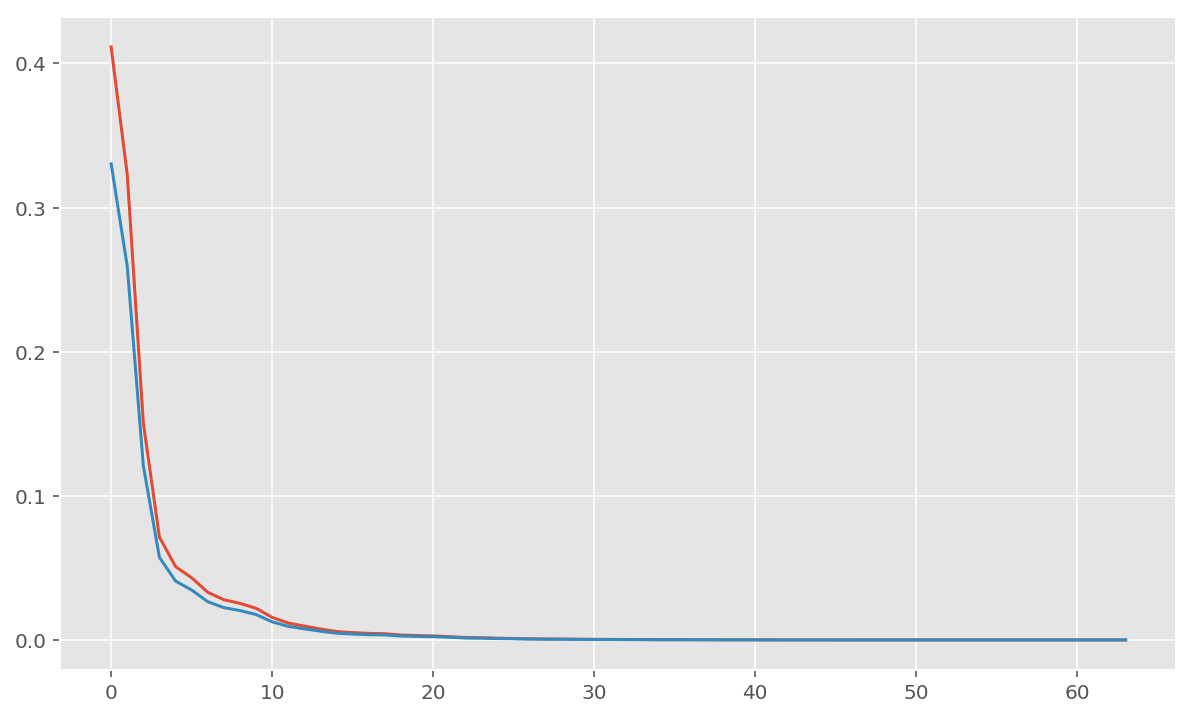

In [140]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(pca.explained_variance_)
plt.plot(pca.explained_variance_ratio_)

#### Plot the transformed image in the (reduced) principal component coordinates 

In [141]:
cols = ['PC{}'.format(i) for i in range(1,pca.n_components_+1)]
face_pca = pd.DataFrame(pca.fit_transform(face10), columns=cols)

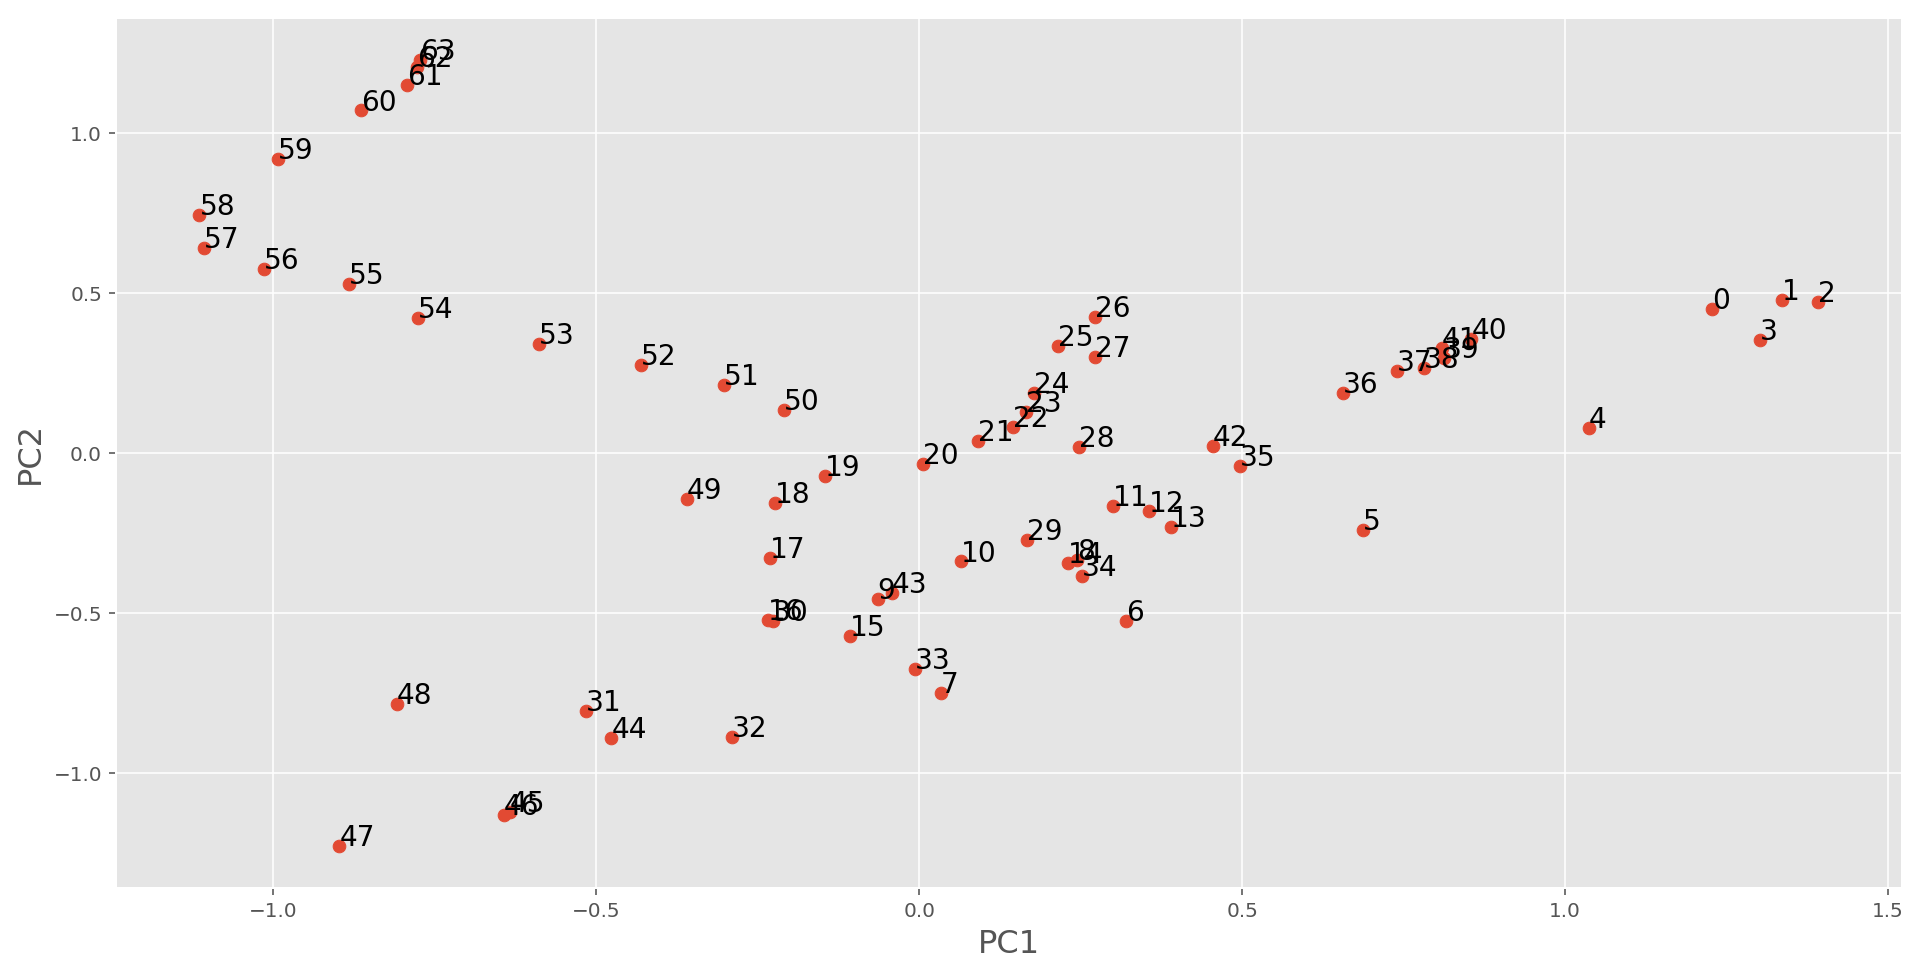

In [142]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(face_pca.PC1,face_pca.PC2, s = 40, cmap='rainbow')
for i, xi in enumerate(face_pca.index):
   ax.annotate(xi, (face_pca.iloc[i,0], face_pca.iloc[i,1]),fontsize=14)
ax.set_xlabel('PC1',fontsize=16)
ax.set_ylabel('PC2',fontsize=16)
plt.show()

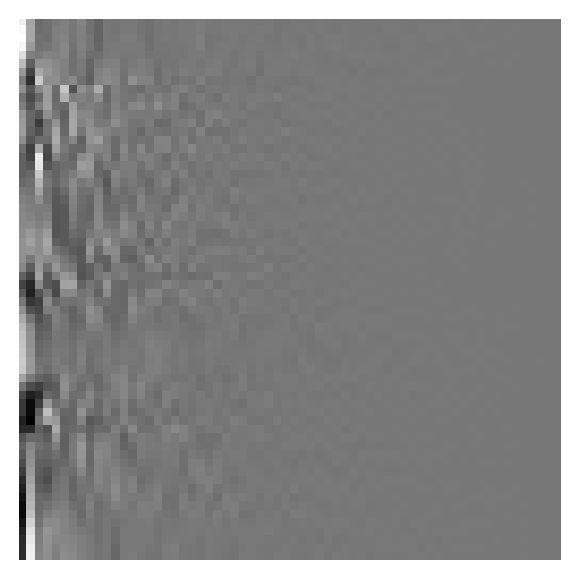

In [143]:
plot_image_matrix(process_image(pca.fit_transform(face10)))

# Note - much of the variance is clustered on the left hand side as these are the first PCs, ie. those with the
# most variance.

# Remember: we're plotting here as an image the fit_transform() object which, if you print it out is a 64x64
# of rows = each datapoint, cols = each PC.

#### Plot the matrix obtained with `pca.components` as an image

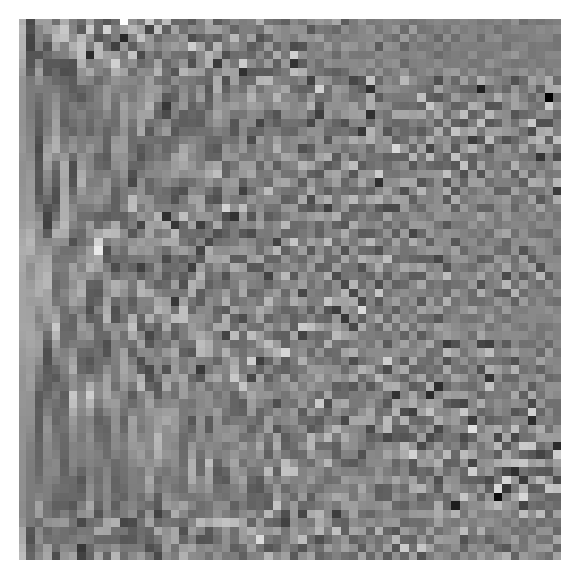

In [144]:
plot_image_matrix(process_image(pca.components_.T))
# This one has principal components again on x-axis, but now it's original features on the y, ie. weights of 
# each feature per PC.

In [145]:
pca.components_.T

array([[ 0.1974, -0.2472,  0.1135, ..., -0.0594, -0.0298, -0.0133],
       [ 0.2344, -0.2184,  0.0154, ...,  0.0424,  0.0144,  0.0449],
       [ 0.2177, -0.2695,  0.0226, ...,  0.0172,  0.0149, -0.0595],
       ...,
       [ 0.1783, -0.2071,  0.0538, ..., -0.048 , -0.057 ,  0.1524],
       [ 0.222 , -0.1531, -0.0152, ...,  0.0971,  0.1146, -0.1052],
       [ 0.253 , -0.1244,  0.0333, ..., -0.0213, -0.0813,  0.1347]],
      dtype=float32)

In [146]:
face_pca = pca.fit_transform(face10)

#### Apply the inverse transform to the transformed image. 

In [147]:
pca.inverse_transform(face_pca)

array([[ 0.0291,  0.0825,  0.1456, ...,  0.034 ,  0.0437,  0.0485],
       [ 0.0437,  0.1165,  0.165 , ...,  0.068 ,  0.0777,  0.0728],
       [ 0.0728,  0.1602,  0.1893, ...,  0.0631,  0.1019,  0.0971],
       ...,
       [-0.4563, -0.4466, -0.4466, ..., -0.5   , -0.4709, -0.4806],
       [-0.4515, -0.4466, -0.4515, ..., -0.4951, -0.4757, -0.4806],
       [-0.4466, -0.4515, -0.4466, ..., -0.4951, -0.4757, -0.4757]],
      dtype=float32)

#### Plot the image obtained after inverse transform. Compare to the original image.

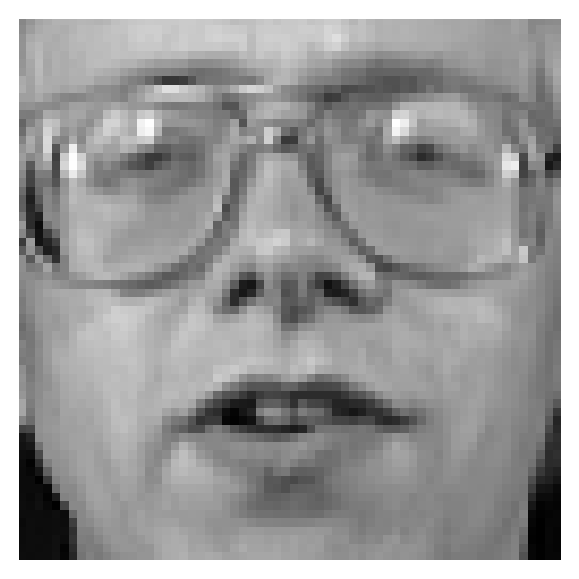

In [148]:
plot_image_matrix(process_image(pca.inverse_transform(face_pca)))

In [150]:
col = ['PC{}'.format(i) for i in range(1,pca.n_components_+1)]
face_pca = pd.DataFrame(face_pca,columns=col)

In [152]:
# You could plot these after fewer PC's were retained, if it's passable then you can save images as only the 
# required PCs and the whole image
plot_image_matrix(process_image(pca.inverse_transform(face_pca.iloc[:,0:5])))

ValueError: shapes (64,5) and (64,64) not aligned: 5 (dim 1) != 64 (dim 0)

### Bonus: Apply clustering to the dataset with all images. Evaluate the assigned cluster labels against the true labels contained in `dataset.target`.

Hints:
- The original dataset contains faces of 40 different persons.
- Have a look at the different available distance metrics, e.g. `cosine`.

In [105]:
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [111]:
model = AgglomerativeClustering(n_clusters=40, affinity='cosine', linkage='single')
model.fit(faces)
labels = model.labels_
homogeneity_completeness_v_measure(dataset.target,labels)

(0.3154023145502028, 0.7770964139440202, 0.44869252694586087)

### Bonus: PCA transform the whole dataset and fit a logistic regression model

In [117]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, train_test_split

In [160]:
pca = PCA()
pca.fit(faces)
col = ['PC{}'.format(i) for i in range(1,pca.n_components_+1)]
X = pd.DataFrame(pca.fit_transform(faces), columns=col)
y = dataset.target

In [155]:
lr = LogisticRegressionCV(multi_class='ovr', n_jobs=2)
lr.fit(X,y)
print('Train score:', lr.score(X,y))
print('CV score:', cross_val_score(lr,X,y,cv=5).mean())

Train score: 1.0
CV score: 0.97


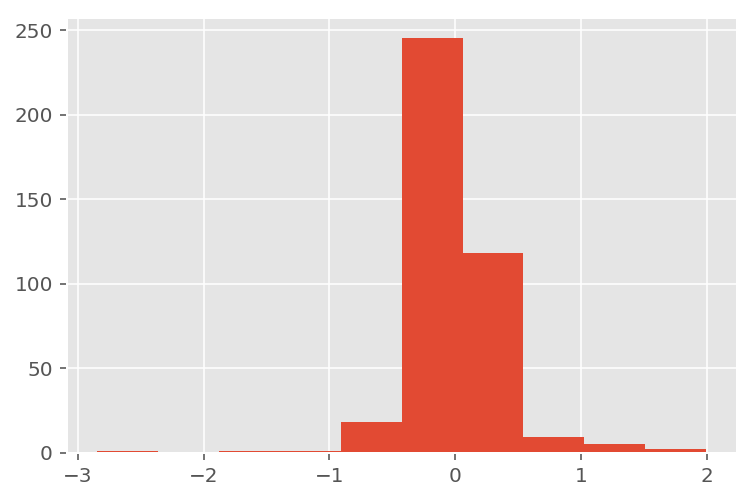

In [158]:
plt.hist(lr.coef_[0]);  # you can see the model_coefs... only a few of them are large pointing to some
# possible regularization

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)
lr = LogisticRegressionCV(multi_class='ovr', n_jobs=2)
lr.fit(X_train,y_train)
print('Train score:', lr.score(X_train,y_train))
print('CV score:', cross_val_score(lr,X_train,y_train,cv=5).mean())
print('Test score:', lr.score(X_test,y_test))

Train score: 1.0
CV score: 0.95
Test score: 0.94


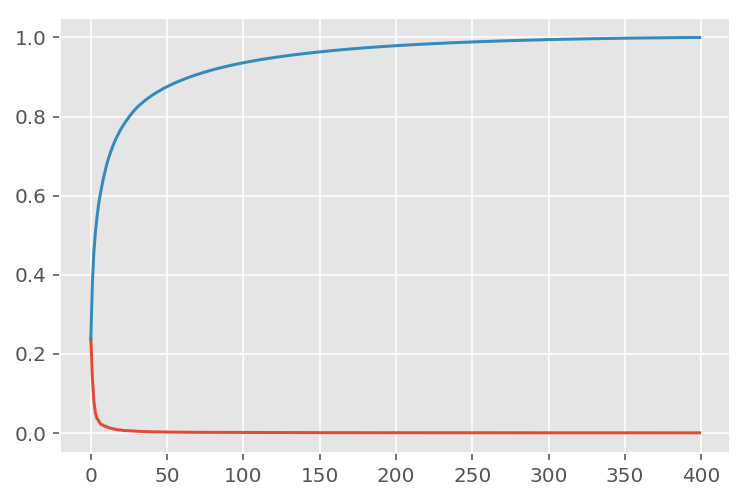

In [162]:
# now reducing PCs... I will look at this chart to guesstimate good number of PCs
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [126]:
X_trim = X.iloc[:,0:30]
X_train, X_test, y_train, y_test = train_test_split(X_trim,y,stratify=y)
lr = LogisticRegressionCV(multi_class='ovr', n_jobs=2)
lr.fit(X_train,y_train)
print('Train score:', lr.score(X_train,y_train))
print('CV score:', cross_val_score(lr,X_train,y_train,cv=5).mean())
print('Test score:', lr.score(X_test,y_test))

Train score: 1.0
CV score: 0.9266666666666665
Test score: 0.98


In [164]:
# the reason why so few PCs retains such a good score is because pictures often have large areas of homogeneity